# TSNE Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download from Atlas and Load Data

In [3]:
from dpet.ensemble import Ensemble


ensembles = [
    Ensemble('PED00423e001', data_path='C:/Users/nikol/Documents/test_dir/testington/PED00423e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/testington/PED00423e001.top.pdb'),
    Ensemble('PED00424e001', data_path='C:/Users/nikol/Documents/test_dir/testington/PED00424e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/testington/PED00424e001.top.pdb')
]
data_dir = 'C:/Users/nikol/Documents/test_dir/testington'

analysis = EnsembleAnalysis(ensembles, data_dir)
analysis.load_trajectories()

Loading trajectory for PED00423e001...
Loading trajectory for PED00424e001...


{'PED00423e001': <mdtraj.Trajectory with 1000 frames, 1374 atoms, 92 residues, without unitcells at 0x22bf9664610>,
 'PED00424e001': <mdtraj.Trajectory with 1000 frames, 1374 atoms, 92 residues, without unitcells at 0x22b8984f340>}

In [4]:
analysis.random_sample_trajectories(sample_size=50)

50 conformations sampled from PED00423e001 trajectory.
50 conformations sampled from PED00424e001 trajectory.


{'PED00423e001': <mdtraj.Trajectory with 50 frames, 1374 atoms, 92 residues, without unitcells at 0x22bfba48af0>,
 'PED00424e001': <mdtraj.Trajectory with 50 frames, 1374 atoms, 92 residues, without unitcells at 0x22bfba48ac0>}

## Featurization

In [5]:
analysis.extract_features(featurization='ca_dist')

Performing feature extraction for Ensemble: PED00423e001.
Transformed ensemble shape: (50, 4095)
Performing feature extraction for Ensemble: PED00424e001.
Transformed ensemble shape: (50, 4095)
Feature names: ['GLY1-MET3', 'GLY1-THR4', 'GLY1-PRO5', 'GLY1-SER6', 'GLY1-THR7', 'GLY1-PRO8', 'GLY1-PRO9', 'GLY1-ARG10', 'GLY1-SER11', 'GLY1-ARG12', 'GLY1-GLY13', 'GLY1-THR14', 'GLY1-ARG15', 'GLY1-TYR16', 'GLY1-LEU17', 'GLY1-ALA18', 'GLY1-GLN19', 'GLY1-PRO20', 'GLY1-SER21', 'GLY1-GLY22', 'GLY1-ASN23', 'GLY1-THR24', 'GLY1-SER25', 'GLY1-SER26', 'GLY1-SER27', 'GLY1-ALA28', 'GLY1-LEU29', 'GLY1-MET30', 'GLY1-GLN31', 'GLY1-GLY32', 'GLY1-GLN33', 'GLY1-LYS34', 'GLY1-THR35', 'GLY1-PRO36', 'GLY1-GLN37', 'GLY1-LYS38', 'GLY1-PRO39', 'GLY1-SER40', 'GLY1-GLN41', 'GLY1-ASN42', 'GLY1-LEU43', 'GLY1-VAL44', 'GLY1-PRO45', 'GLY1-VAL46', 'GLY1-THR47', 'GLY1-PRO48', 'GLY1-SER49', 'GLY1-THR50', 'GLY1-THR51', 'GLY1-LYS52', 'GLY1-SER53', 'GLY1-PHE54', 'GLY1-LYS55', 'GLY1-ASN56', 'GLY1-ALA57', 'GLY1-PRO58', 'GLY1-LEU59',

{'PED00423e001': array([[0.60186356, 0.91232955, 1.2536446 , ..., 0.5532718 , 0.5525019 ,
         0.5496507 ],
        [0.66177756, 0.98079944, 1.2906377 , ..., 0.6379903 , 0.9484688 ,
         0.59537685],
        [0.56492853, 0.8297473 , 1.1959175 , ..., 0.5976552 , 0.92461   ,
         0.7282871 ],
        ...,
        [0.5318786 , 0.89164805, 1.2411727 , ..., 0.53259593, 0.45651257,
         0.5207346 ],
        [0.7170797 , 1.0052236 , 1.3081257 , ..., 0.699633  , 0.94576484,
         0.6452456 ],
        [0.6906409 , 1.0554968 , 1.3854507 , ..., 0.54837996, 0.5128264 ,
         0.50710404]], dtype=float32),
 'PED00424e001': array([[0.718288  , 1.0699149 , 1.3896573 , ..., 0.5926568 , 0.68166834,
         0.5392741 ],
        [0.5277335 , 0.89062095, 1.2326746 , ..., 0.66103137, 0.917022  ,
         0.616929  ],
        [0.6445115 , 0.88647825, 0.9873879 , ..., 0.58449286, 0.7979264 ,
         0.64934117],
        ...,
        [0.6695718 , 0.87313783, 1.2347745 , ..., 0.55953467,

## Dimensionality Reduction

In [6]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 50], circular=True, range_n_clusters=range(2,10,1))

Concatenated featurized ensemble shape: (100, 4095)
tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

Best Perplexity: 50
Best Number of Clusters: 2


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

array([[ 1.6830599 , -1.2646388 ],
       [ 1.0151819 , -6.35204   ],
       [ 1.5639818 , -2.3810759 ],
       [ 2.1079829 , -4.9761367 ],
       [ 1.5615875 , -3.8806374 ],
       [ 0.1085271 , -1.6114074 ],
       [ 0.3392968 , -3.9029453 ],
       [ 0.40465632, -6.105308  ],
       [ 0.98376644, -5.68158   ],
       [-1.379144  , -0.9925604 ],
       [ 0.802308  , -4.0359783 ],
       [-2.3621562 , -2.9406865 ],
       [-0.90315276, -2.2238317 ],
       [-1.4824845 , -2.2641265 ],
       [-1.5244467 , -0.4937558 ],
       [-0.7907472 , -1.3786619 ],
       [ 1.7195251 , -6.692684  ],
       [-0.21803243, -4.8540287 ],
       [ 1.4378295 , -6.135806  ],
       [-1.8857286 , -2.483883  ],
       [-1.7528231 , -0.9210512 ],
       [-0.8099732 , -4.349153  ],
       [ 1.8310684 , -5.342622  ],
       [ 1.4906249 , -5.335213  ],
       [-0.4328204 , -1.3257751 ],
       [-0.1919118 , -1.9630344 ],
       [ 0.6820987 , -4.6411686 ],
       [ 0.30568713, -3.006548  ],
       [ 0.8480031 ,

## Analysis

In [7]:
from dpet.visualization import Visualization


visualization = Visualization(analysis)

visualization.tsne_ramachandran_density(save=True)

This analysis is only valid for t-SNE reduction with phi_psi feature extraction.


array([<Axes: title={'center': 'Scatter plot (original labels)'}>,
       <Axes: title={'center': 'Scatter plot (clustering labels)'}>,
       <Axes: title={'center': 'Scatter plot (??? labels)'}>,
       <Axes: title={'center': 'Density Plot'}>], dtype=object)

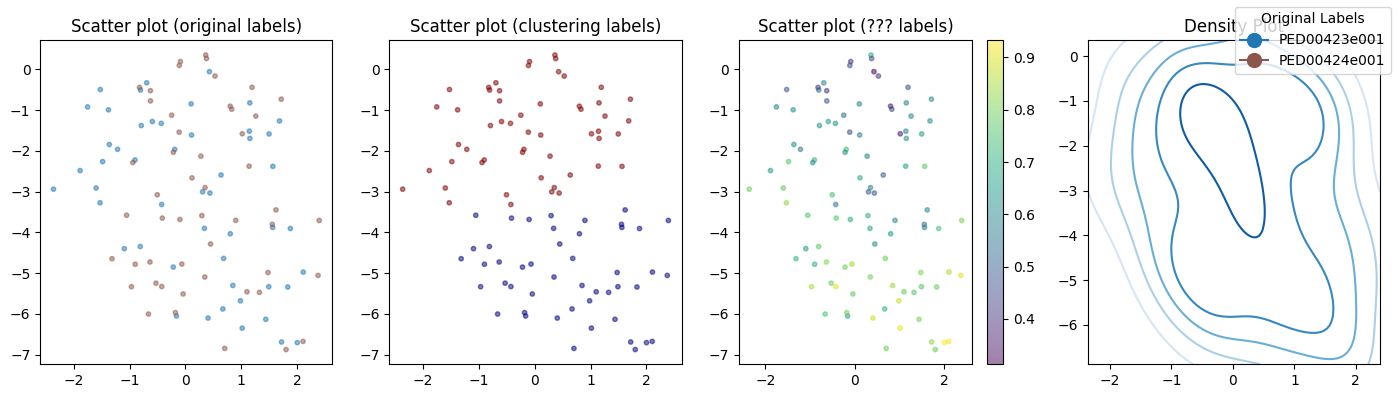

In [11]:
visualization.tsne_scatter(color_by="asphericity", save=False)

UnboundLocalError: local variable 'colors' referenced before assignment

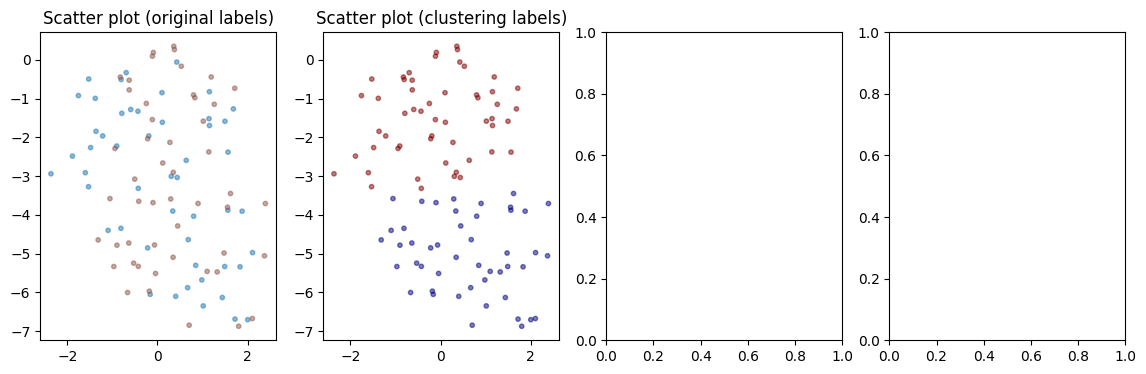

In [9]:
visualization.generate_report()

In [ ]:
visualization.generate_custom_report()

Plots saved to C:\Users\nikol\Documents\test_dir\testington\plots\custom_report.pdf
